<img src="./images/logo-ensae.jpg" width = 40%><img src="./images/logo-ipparis.jpg" width = 30%>

**"Geometric Methods in Machine Learning", S2 2018-19** 
# *Studying Time Series using Dynamic Time Warping*  

**Yosuke IJIRI**, *Mastère Spécialisé Data Science, ENSAE ParisTech*  

## Overview

In [451]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Instructions
Download the Sales Transactions Weekly Dataset. You will recover 800 time series of sales of different products with 52 timestamps (one for each week). Alternatively, you can also download any other dataset of your liking, with the same type, i.e. labelled time series, with a few hundreds or thousands of time series of moderate length.  
  
**Outcome:** a zip file containing your report in pdf (not a .doc) and code in whatever format (you can send a notebook).

## 1. Data Preparation

In [522]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image
from IPython.display import HTML
import itertools
import time

In [21]:
df = pd.read_csv('./data/Sales_Transactions_Dataset_Weekly.csv')
df.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [24]:
# Take out the normalized values from the dataframe
idx = [i for i in range(df.shape[1]) if 'Normalized' in df.columns[i]]
ndf = df.iloc[:, idx]
ndf.head()

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.44,0.50,0.39,0.28,0.56,0.50,0.61,1.00,0.17,0.61,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,0.70,0.60,0.30,0.20,0.70,0.10,0.60,0.30,0.30,0.30,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,0.33,0.13,0.67,0.53,0.20,0.27,0.40,0.73,0.40,0.40,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [467]:
# Transform the data from dataframe to numpy.ndarry
data = ndf.values
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(811, 52)


## 2. Dynamic Time Warping
**Objective: Implement the dynamic time warping distance in your programming language of choice.**

[521, 505]


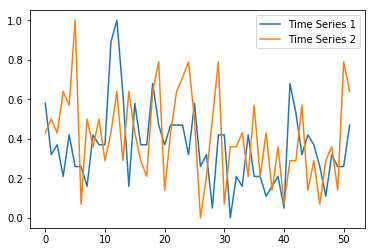

In [469]:
# Plot two sample time series that are chosen randomly
samples = random.sample(range(data.shape[0]), 2)
print(samples)
ts1 = data[samples[0]]
ts2 = data[samples[1]]
plt.plot(ts1, label="Time Series 1")
plt.plot(ts2, label="Time Series 2")
plt.legend();

In [257]:
def DTW(x, y):
    '''
    Returns the Path Cost matrix and the DTW distance
    '''
    nrow = len(x)  # 52
    ncol = len(y)  # 52
    
    # Initialise the cost matrix
    C = np.zeros([nrow,ncol])
    C[0, :], C[:, 0] = np.infty, np.infty
    C[0,0] = 0
    
    # Bellman Recursion
    for i in range(nrow-1):
        for j in range(ncol-1):
            D = np.abs(x[i] - y[j])
            C[i+1][j+1] = D + np.min([C[i+1][j], C[i][j], C[i][j+1]])
    
    return C

In [261]:
def opt_path(dtw):
    '''
    Returns the optimal path
    '''
    rlen = dtw.shape[0]
    clen = dtw.shape[1]
    
    r = rlen-1
    c = clen-1

    # Initialise the paths
    r_path = [r]
    c_path = [c]
    cost_path = [dtw[r,c]]   

    while (r!=0 or c!=0):
        cost_temp = dtw[r, c]
    
        if dtw[r, c-1] <= cost_temp:
            r_temp = r
            c_temp = c-1
            cost_temp = dtw[r, c-1]    
        if dtw[r-1, c-1] <= cost_temp:
            r_temp = r-1
            c_temp = c-1
            cost_temp = dtw[r-1, c-1] 
        if dtw[r-1, c] <= cost_temp:
            r_temp = r-1
            c_temp = c
            cost_temp = dtw[r-1, c]
        
        r = r_temp
        c = c_temp
        r_path += [r]
        c_path += [c]
        cost_path += [cost_temp]
        
    r_path = list(reversed(r_path))[1:]
    c_path = list(reversed(c_path))[1:]
    cost_path = list(reversed(cost_path))[1:]

    return(r_path, c_path, cost_path, rlen, clen)

In [358]:
def opt_path_vis(r_path, c_path, cost_path, rlen, clen):
    '''
    Visualisation of the Optimal Path
    '''
    nrow = rlen
    ncol = clen

    plt.figure(figsize=(rlen/2,clen/2))
    plt.scatter(np.array(r_path),np.array(c_path), label="Optimal Path Points (cost)")
    plt.xlim(0,clen-.5)
    plt.ylim(rlen-.5,0)
    for i in range(nrow):
        plt.axhline(i+1, linestyle='-', color='lightgray')
        plt.axvline(i+1, linestyle='-', color='lightgray')
    for i in range(len(r_path)):
        plt.annotate(s="("+str(round(cost_path[i], 2))+")", xy=(r_path[i]+0.1,c_path[i]-0.2))
    plt.xticks(range(ncol))
    plt.yticks(range(nrow))
    plt.xlabel("Time Series 1")
    plt.ylabel("Time Series 2")
    plt.title("Optimal Path")
    plt.legend()
    plt.savefig('./data/optimal_path.png')

In [ ]:
r_path, c_path, cost_path, rlen, clen = get_path(dtw)

In [437]:
def opt_path_ladder(ts1, ts2, r_path, c_path):
    '''
    Visualisation of the Optimal Path Ladder
    '''
    plt.plot(ts1, label="Time Series 1")
    plt.plot(ts2, label="Time Series 2" )

    r_path = res[0]
    c_path = res[1]

    for i in range(len(r_path)):
        a = [r_path[i]-1,c_path[i]-1]
        b = [ts1[r_path[i]-1],ts2[c_path[i]-1]]
        plt.plot(a, b, color="lightcoral", linewidth=.5 )
    
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    plt.grid(False)
    plt.title("Optimal Path Ladder")
    plt.legend()
    plt.savefig('./data/optimal_path_ladder.png')

In [479]:
def dtw_method(ts1, ts2):
    '''
    Set of the two functions
    '''
    dtw = DTW(ts1, ts2)
    res = opt_path(dtw)
    return res

In [484]:
def dtw_method_vis(res):
    '''
    Set of the two visualisation functions
    '''
    opt_path_vis(res[0],res[1],res[2],res[3],res[4])
    plt.close()
    opt_path_ladder(ts1, ts2, res[0], res[1])
    plt.close()

In [488]:
# Execute the method
res = dtw_method(ts1, ts2)

# Display the results
dtw_method_vis(res)
html = """     
<table border="0">
<tr>
<td><img src="./data/optimal_path.png" width=600></td>
<td><img src="./data/optimal_path_ladder.png" width=400></td>
</tr>
</table>
"""
HTML(html)

,


## 3. Isomap
**Objective: Compute the dynamic time warping distance matrix between all 800 instances and try to embed these points in 2 dimensions using Isomap (you should implement it, not use scikitlean or other public implementations). Display these results.**

In [599]:
def dissimilarity(data):
    '''
        Return the dissimilarity between the points in matrix `data` (n_samples, n_features).
        Here, the dissimilarity is the Dynamic Time Warping Distance.
    '''
    start = time.time()
    for i in range(n):
        for j in range(n):
            print("\r", i , j, "     ", end="")
            if i <= j:
                C = DTW(data[i], data[j])[51,51]
                D[i,j] = C
            else:
                D[i,j] = D[j,i]
        lap = time.time()
        print(i, "th (", round((lap-start)/60, 3), "min )")
        np.save("./data/dissimilarity_matrix.npy", D)
    return D

In [ ]:
D = dissimilarity(data)

 0 810      0 th ( 0.575 min )
 1 810      1 th ( 1.139 min )
 2 810      2 th ( 1.695 min )
 3 810      3 th ( 2.234 min )37       727      
 4 810      4 th ( 2.783 min )  4 626      
 5 810      5 th ( 3.363 min )
 6 810      6 th ( 3.932 min )    291      
 7 810      7 th ( 4.479 min )
 8 810      8 th ( 5.088 min )
 9 810      91       th ( 5.636 min )
 10 810      10 th ( 6.203 min )
 11 810      11 th ( 6.772 min )   
 12 810      12 th ( 7.403 min )
 13 810      13 th ( 8.015 min )
 14 810      14 th ( 8.598 min )
 15 810      15 th ( 9.161 min )
 16 810      16 361      16 th ( 9.761 min )
 17 810      17 th ( 10.307 min )
 18 810      18         th ( 10.882 min )
 19 810       601      19 th ( 11.441 min )
 20 810      20 th ( 11.981 min )
 21 810      21 th ( 12.519 min ) 
 22 810      22 th ( 13.067 min )
 23 810      23 262      289      23 481       757      23 th ( 13.651 min )
 24 810            346                24 th ( 14.232 min )
 25 810      25 th ( 14.801 min )


In [598]:
D_recovered = np.load("./data/dissimilarity_matrix.npy")
D_recovered

array([[ 0.  ,  7.24, 10.49, ...,  9.97, 10.2 ,  9.03],
       [ 7.24,  0.  ,  9.34, ..., 10.3 , 10.6 , 10.56],
       [10.49,  9.34,  0.  , ..., 13.48, 12.58, 15.85],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [540]:
def gram(D):
    '''
        Return the Gram matrix associated with the dissimilarity matrix `D`.
    '''
    n = D.shape[0]
    P = np.identity(n) - np.ones((n,n))/n
    G = -1/2 * P.dot(D).dot(P)
    return G

In [550]:
def MDS(D, d=2):
    '''
        Compute the MDS of the dataset in matrix `data`(n_samples, n_features), with target dimension `d`.
    '''
    G = gram(D)
    eigenvalues, eigenvectors = np.linalg.eigh(G)
    
    return eigenvectors[:,-d:].dot(np.diag(np.sqrt(eigenvalues[-d:])))

In [ ]:
data_reduced = MDS(D_recovered, d=2)

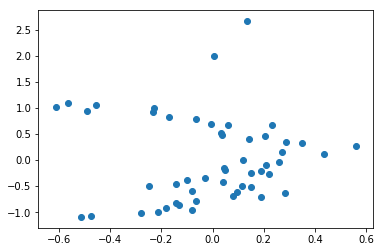

In [544]:
plt.scatter(data_reduced[:,0], data_reduced[:,1], cmap='hot')#, c=(y/np.max(y)))
plt.show()

## 4. MDS
**Objective: Embed now these points in a higher dimension using still MDS (e.g. 5). Check that the stress you have found is indeed smaller. Use a simple k-means algorithm on these representations to gather these 800 observations in k subgroups (set k as you wish).**

In [ ]:
data_reduced_5 = MDS(D_recovered, d=5)

- Compute the Nearest Neighbors Graph

For each point $i$ in the dataset, we will compute its $k$ nearest neighbors and draw an edge between $i$ and all its nearest neighbors.

In [ ]:
def B(Z, D):
    '''
        Return the matrix B in SMACOF iteration.
    '''
    A = -np.divide(D, dissimilarity_sqrt(Z)+1e-20) # Add 1e-20 for stability issues
    A = A - np.diag(np.sum(A,0))
    return A

In [ ]:
def mMDS(data, d, N_iter=100, D_precomputed=None):
    '''
        Compute the mMDS of the dataset `data`, with target dimension `d` and `N_iter` iterations in SMACOF.
    '''
    n = data.shape[0]
    
    # Initialize at random
    Z = np.random.normal(size=d*n).reshape([n,d])
    
    if D_precomputed is None:
        D = dissimilarity_sqrt(X)
    else:
        D = D_precomputed
    # Run the algorithm
    stress = []
    for i in range(N_iter):
        Z = B(Z,D).dot(Z)/n
        stress.append(np.sum(np.sum((D-dissimilarity_sqrt(Z))**2)))
    
    return Z, np.array(stress)/(n*n)

In [ ]:
# k-Nearest-Neighbors
k = 3

Z2, stress2 = mMDS(X, d=2, N_iter=200, D_precomputed=D)
print('Stress value with d=2: ', stress2[-1])

Z5, stress5 = mMDS(X, d=5, N_iter=200, D_precomputed=D)
print('Stress value with d=5: ', stress5[-1])

In [ ]:
plt.scatter(Z2[:,0], Z2[:,1], cmap='hot')
plt.show()

In [ ]:
plt.figure(figsize=(16,4))
plt.title('Convergence of SMACOF algorithm (d=2)', fontsize=30)
plt.plot(stress2, lw=5)
plt.ylabel('Stress', fontsize=25)
plt.xlabel('Number of iterations', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [ ]:
plt.figure(figsize=(16,4))
plt.title('Convergence of SMACOF algorithm (d=5)', fontsize=30)
plt.plot(stress5, lw=5)
plt.ylabel('Stress', fontsize=25)
plt.xlabel('Number of iterations', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## 5. Time Series Averaging
**Objective: In order to visualize representative examples for each class in these samples, we consider time series averaging. We will compute an average for each of the k clusters computed in the previous question. Code to compute such averages is available in R or Python. Plot these averages and compare them with the usual Euclidean averaging you would obtain by simply summing these time-series.**

In [ ]:
# Time Series Averaging code by F. PetitJean
from src.DBA import *

In [ ]:
t = np.arange(0, 5, 0.01)

In [ ]:
def f(t, a) :
    return np.maximum(t-a, 0)*np.exp(-5*(t-a))

In [ ]:
plt.figure(figsize=(15, 10))
mean = np.zeros(t.shape[0])
n = 15
series = list()
for i in range(n) :
    seriei = f(t, 0.5*np.random.rand())
    mean += seriei
    series.append(seriei)
    plt.plot(t, seriei)
average = performDBA(series, n_iterations=20)
plt.title('Comparison of Arithmetic Averaging Vs DBA Averaging')
plt.plot(t, average, linewidth = 7, color = 'blue', label = 'DBA Averaging')
plt.plot(t, mean/n, linewidth = 7, color = 'black', label = 'Arithmetic Averaging')
plt.legend()
plt.show()